In [17]:
import json
import os
import glob
import pandas as pd
import numpy as np

In [3]:
backbone_mil_path = r"D:\github\slideflow\panda_project\milmodel_backbone_runtime_data.json"


# Open and read the JSON file
with open(backbone_mil_path, 'r') as file:
    data = json.load(file)

print(data)

{'bags_ctranspath': {'attention_mil': 598.1933002471924, 'clam_sb': 851.1210656166077, 'clam_mb': 939.5656821727753, 'mil_fc_mc': 833.4391198158264, 'transmil': 2677.806139230728}, 'bags_histossl': {'attention_mil': 595.9160656929016, 'clam_sb': 907.8765163421631, 'clam_mb': 948.3849937915802, 'mil_fc_mc': 838.5518620014191, 'transmil': 2595.6567022800446}, 'bags_plip': {'attention_mil': 497.41191840171814, 'clam_sb': 738.463280916214, 'clam_mb': 845.3696088790894, 'mil_fc_mc': 704.9365627765656, 'transmil': 2516.0594725608826}, 'bags_retccl': {'attention_mil': 1196.8943972587585, 'clam_sb': 1600.0826416015625, 'clam_mb': 1670.6109874248505, 'mil_fc_mc': 1594.853035211563, 'transmil': 2793.3593158721924}, 'bags_resnet50_imagenet': {'attention_mil': 1200.8337287902832, 'clam_sb': 1594.5760266780853, 'clam_mb': 1652.8183727264404, 'mil_fc_mc': 1592.390249967575, 'transmil': 2897.256409883499}}


In [4]:
runtime_df = pd.DataFrame(data)
runtime_df.columns = ['ctranspath', 'histossl','plip','retccl','resnet50_imagenet']
runtime_df = runtime_df.T 
runtime_df = runtime_df.round(2)
runtime_df

,attention_mil,clam_sb,clam_mb,mil_fc_mc,transmil
ctranspath,598.19,851.12,939.57,833.44,2677.81
histossl,595.92,907.88,948.38,838.55,2595.66
plip,497.41,738.46,845.37,704.94,2516.06
retccl,1196.89,1600.08,1670.61,1594.85,2793.36
resnet50_imagenet,1200.83,1594.58,1652.82,1592.39,2897.26


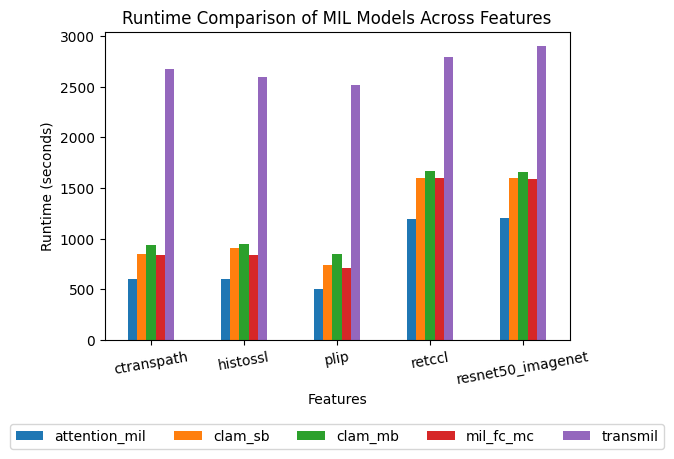

In [45]:
import matplotlib.pyplot as plt

ax = runtime_df.plot(kind='bar', figsize=(6, 4))
ax.set_xlabel("Features")
ax.set_ylabel("Runtime (seconds)")
ax.set_title("Runtime Comparison of MIL Models Across Features")
plt.xticks(rotation=10)
# Place a legend outside the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.show()

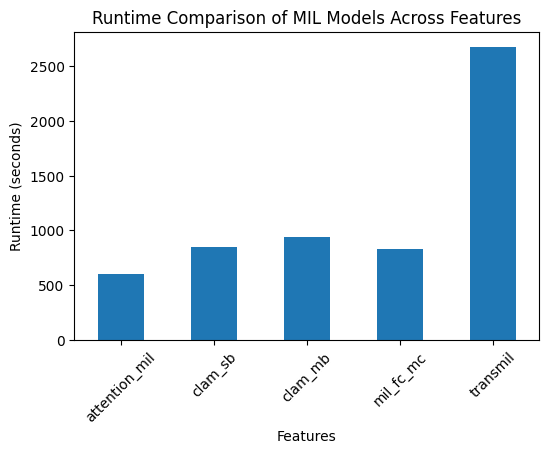

In [28]:

ax = runtime_df.loc['ctranspath'].plot(kind='bar', figsize=(6, 4))
ax.set_xlabel("Features")
ax.set_ylabel("Runtime (seconds)")
ax.set_title("Runtime Comparison of MIL Models Across Features")
plt.xticks(rotation=45)
plt.show()

# Consolidate test prediticon metrics for comparision

In [46]:
project_path = r'D:\github\slideflow\panda_project'


bag_names = ['bags_ctranspath','bags_histossl','bags_plip','bags_retccl','bags_resnet50_imagenet']
mil_models =  ['attention_mil','clam_sb', 'clam_mb', 'mil_fc_mc','transmil']
# metrics_df = pd.DataFrame()
metrics_list = []


for bag in bag_names:
    feature = bag.split('_')[1] 
# Loop over each model type
    for model in mil_models:
        print(f"Loaded model: model_{model}_{bag}")
        model_dir = os.path.join(project_path,f'model_{model}_{bag}')
        print('model_dir:',model_dir)
        mil_model_files = glob.glob(f'{model_dir}/**/test_metrics_output.json',  recursive = True)
        # print(mil_model_files)
        print('last item:',mil_model_files[-1])
        # Open and read the JSON file
        with open(mil_model_files[-1], 'r') as file:
            data = json.load(file)
        
         # Remove the 'Classification Report' from the data before creating the DataFrame
        if 'Classification Report' and 'Per-class F1 Score' in data:
            del data['Classification Report']
            del data['Per-class F1 Score']

        # Convert the data to a DataFrame
        data_df = pd.DataFrame([data]) 
        data_df['mil_model'] = model
        data_df['feature'] = feature
        # metrics_df = metrics_df.append(data_df, ignore_index=True)
        metrics_list.append(data_df)  # A

        
        # break
    # break

# Concatenate all dataframes in the list
metrics_df = pd.concat(metrics_list, ignore_index=True)
metrics_df

Loaded model: model_attention_mil_bags_ctranspath
model_dir: D:\github\slideflow\panda_project\model_attention_mil_bags_ctranspath
last item: D:\github\slideflow\panda_project\model_attention_mil_bags_ctranspath\00002-attention_mil-label\test_metrics_output.json
Loaded model: model_clam_sb_bags_ctranspath
model_dir: D:\github\slideflow\panda_project\model_clam_sb_bags_ctranspath
last item: D:\github\slideflow\panda_project\model_clam_sb_bags_ctranspath\00004-clam_sb-label\test_metrics_output.json
Loaded model: model_clam_mb_bags_ctranspath
model_dir: D:\github\slideflow\panda_project\model_clam_mb_bags_ctranspath
last item: D:\github\slideflow\panda_project\model_clam_mb_bags_ctranspath\00002-clam_mb-label\test_metrics_output.json
Loaded model: model_mil_fc_mc_bags_ctranspath
model_dir: D:\github\slideflow\panda_project\model_mil_fc_mc_bags_ctranspath
last item: D:\github\slideflow\panda_project\model_mil_fc_mc_bags_ctranspath\00001-mil_fc_mc-label\test_metrics_output.json
Loaded model

,Test Accuracy,Weighted F1 Score,Test ROC AUC Score,mil_model,feature
0,0.814607,0.812094,0.971955,attention_mil,ctranspath
1,0.769663,0.767843,0.947993,clam_sb,ctranspath
2,0.691011,0.687821,0.903695,clam_mb,ctranspath
3,0.623596,0.617677,0.890129,mil_fc_mc,ctranspath
4,0.710037,0.711729,0.938767,transmil,ctranspath
5,0.943820,0.943444,0.990375,attention_mil,histossl
6,0.752809,0.755907,0.958176,clam_sb,histossl
7,0.837079,0.835557,0.969836,clam_mb,histossl
8,0.657303,0.663035,0.914037,mil_fc_mc,histossl
9,0.728625,0.719932,0.962664,transmil,histossl


In [12]:
metrics_df.to_csv(r'D:\github\slideflow\panda_project\test_metrics_mil&backbone_all.csv', index=False)

## PLot ctranspath

In [21]:
perf_ctranspath = metrics_df[metrics_df['feature'] == 'ctranspath']
del perf_ctranspath['feature']
perf_ctranspath

,Test Accuracy,Weighted F1 Score,Test ROC AUC Score,mil_model
0,0.814607,0.812094,0.971955,attention_mil
1,0.769663,0.767843,0.947993,clam_sb
2,0.691011,0.687821,0.903695,clam_mb
3,0.623596,0.617677,0.890129,mil_fc_mc
4,0.710037,0.711729,0.938767,transmil


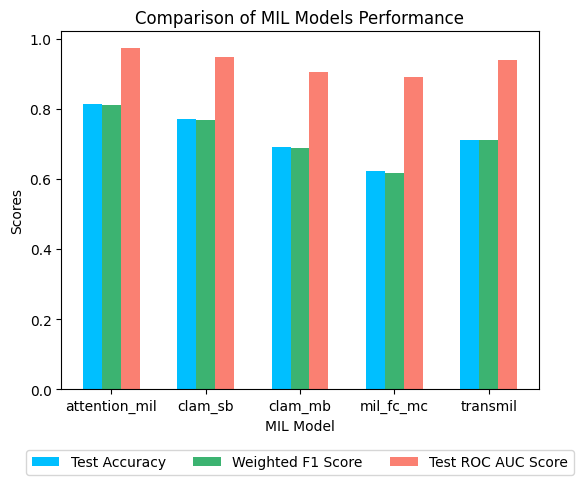

In [26]:
# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

# Number of metrics
n_metrics = len(perf_ctranspath.columns) - 1  # subtract 1 for 'mil_model'
bar_width = 0.2  # width of bars

# Colors for each metric using a new color scheme
colors = ['deepskyblue', 'mediumseagreen', 'salmon']

# Create bars for each metric
for i, metric in enumerate(perf_ctranspath.columns[:-1]):
    ax.bar(np.arange(len(perf_ctranspath)) + i * bar_width, perf_ctranspath[metric], color=colors[i], width=bar_width, label=metric)

# Set model names as x-axis labels
ax.set_xticks(np.arange(len(perf_ctranspath)) + bar_width)
ax.set_xticklabels(perf_ctranspath['mil_model'])

# Adding labels and title
ax.set_xlabel('MIL Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MIL Models Performance')

# Place a legend outside the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show plot
plt.tight_layout()
plt.show()

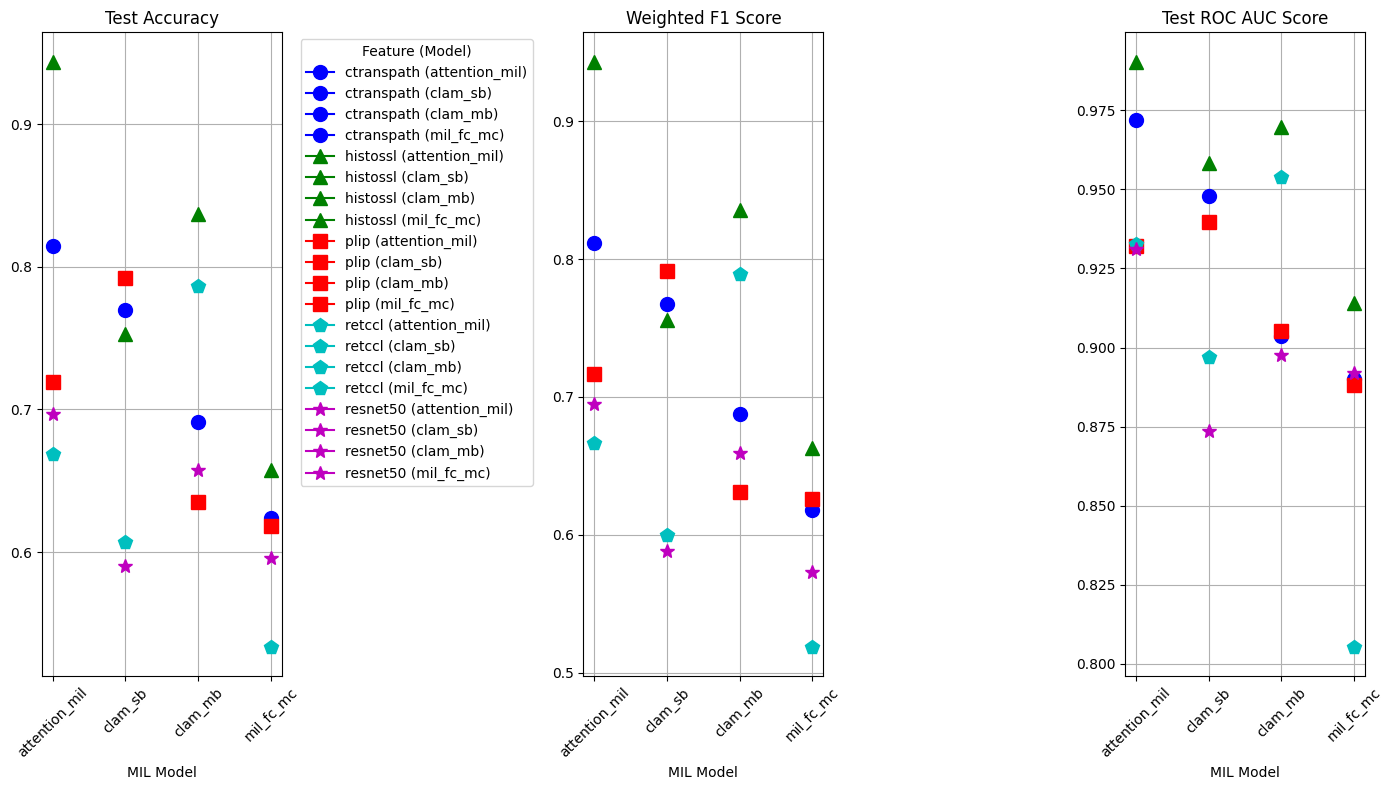

In [7]:
df = metrics_df.copy()
# Create a new figure and set its size
plt.figure(figsize=(14, 8))

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors and markers for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', '^', 's', 'p', '*', '+', 'x']

# Iterate over each metric
for i, metric in enumerate(["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    plt.subplot(1, 3, i+1)  # Create subplots for each metric
    for feature, color, marker in zip(features, colors, markers):
        # Filter data for each feature
        subset = df[df['feature'] == feature]
        for model in models:
            # Filter data for each model
            model_data = subset[subset['mil_model'] == model]
            plt.plot(model_data['mil_model'], model_data[metric], label=f'{feature} ({model})', color=color, marker=marker, markersize=10)
    plt.title(metric)
    plt.xlabel('MIL Model')
    plt.xticks(rotation=45)
    plt.grid(True)
    if i == 0:
        plt.legend(title='Feature (Model)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

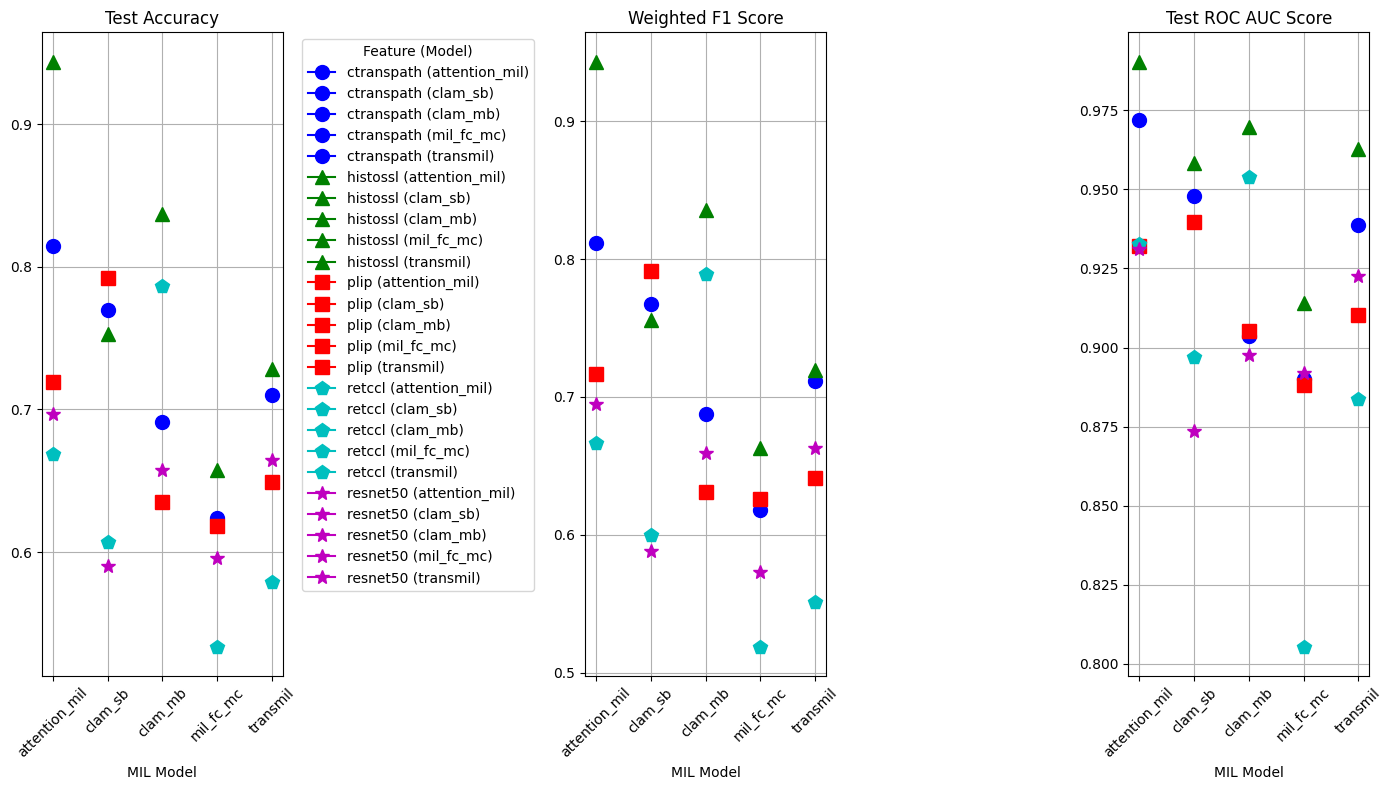

In [19]:
df = metrics_df.copy()
# Create a new figure and set its size
plt.figure(figsize=(14, 8))

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors and markers for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', '^', 's', 'p', '*', '+', 'x']

# Iterate over each metric
for i, metric in enumerate(["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    plt.subplot(1, 3, i+1)  # Create subplots for each metric
    for feature, color, marker in zip(features, colors, markers):
        # Filter data for each feature
        subset = df[df['feature'] == feature]
        for model in models:
            # Filter data for each model
            model_data = subset[subset['mil_model'] == model]
            plt.plot(model_data['mil_model'], model_data[metric], label=f'{feature} ({model})', color=color, marker=marker, markersize=10)
    plt.title(metric)
    plt.xlabel('MIL Model')
    plt.xticks(rotation=45)
    plt.grid(True)
    if i == 0:
        plt.legend(title='Feature (Model)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

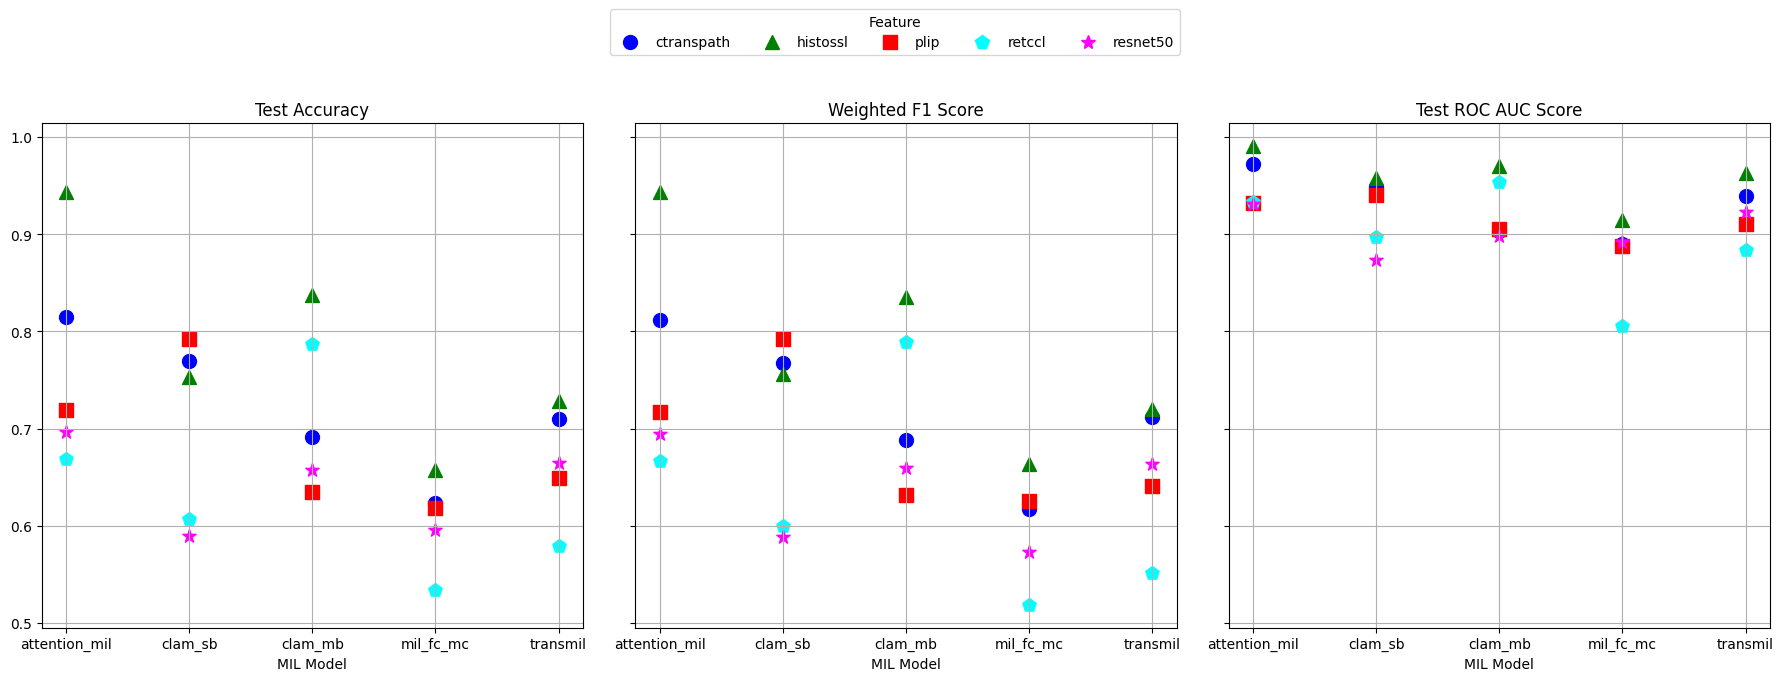

In [47]:
# markers = ['o', '^', 's', 'p', '*', '+', 'x']# Example markers
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors and markers for each feature
feature_colors = ['blue', 'green', 'red', 'cyan', 'magenta']
markers = ['o', '^', 's', 'p', '*']  # Example markers
feature_styles = dict(zip(features, zip(feature_colors, markers)))

# Plot each metric
for ax, metric in zip(axes, ["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    for model in models:
        for feature in features:
            color, marker = feature_styles[feature]
            model_data = df[(df['mil_model'] == model) & (df['feature'] == feature)]
            ax.scatter(model_data['mil_model'], model_data[metric], label=f"{feature} ({model})" if model == models[0] else "",
                       color=color, marker=marker, s=100)  # Increase size if needed

    ax.set_title(metric)
    ax.set_xlabel('MIL Model')
    ax.grid(True)

# Configure legend
legend_elements = [plt.Line2D([0], [0], color=color, marker=marker, linestyle='', markersize=10)
                   for (color, marker) in feature_styles.values()]
fig.legend(handles=legend_elements, labels=list(feature_styles.keys()),
           loc='lower center', bbox_to_anchor=(0.5, 1.04), ncol=5, title="Feature")

# Adjust layout and display
plt.tight_layout()
plt.show()

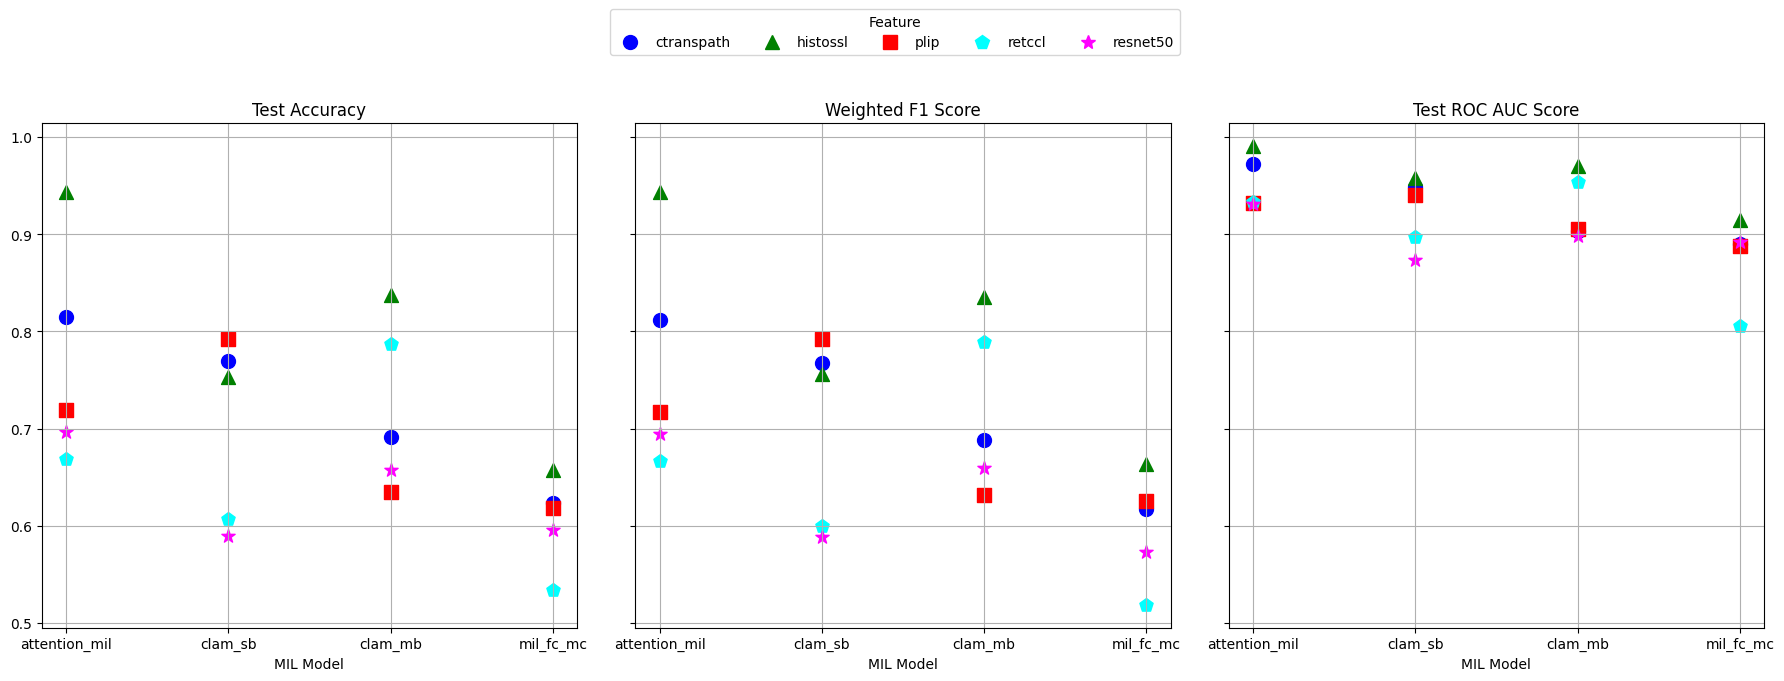

In [23]:
# markers = ['o', '^', 's', 'p', '*', '+', 'x']# Example markers
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors and markers for each feature
feature_colors = ['blue', 'green', 'red', 'cyan', 'magenta']
markers = ['o', '^', 's', 'p', '*']  # Example markers
feature_styles = dict(zip(features, zip(feature_colors, markers)))

# Plot each metric
for ax, metric in zip(axes, ["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    for model in models:
        for feature in features:
            color, marker = feature_styles[feature]
            model_data = df[(df['mil_model'] == model) & (df['feature'] == feature)]
            ax.scatter(model_data['mil_model'], model_data[metric], label=f"{feature} ({model})" if model == models[0] else "",
                       color=color, marker=marker, s=100)  # Increase size if needed

    ax.set_title(metric)
    ax.set_xlabel('MIL Model')
    ax.grid(True)

# Configure legend
legend_elements = [plt.Line2D([0], [0], color=color, marker=marker, linestyle='', markersize=10)
                   for (color, marker) in feature_styles.values()]
fig.legend(handles=legend_elements, labels=list(feature_styles.keys()),
           loc='lower center', bbox_to_anchor=(0.5, 1.04), ncol=5, title="Feature")

# Adjust layout and display
plt.tight_layout()
plt.show()

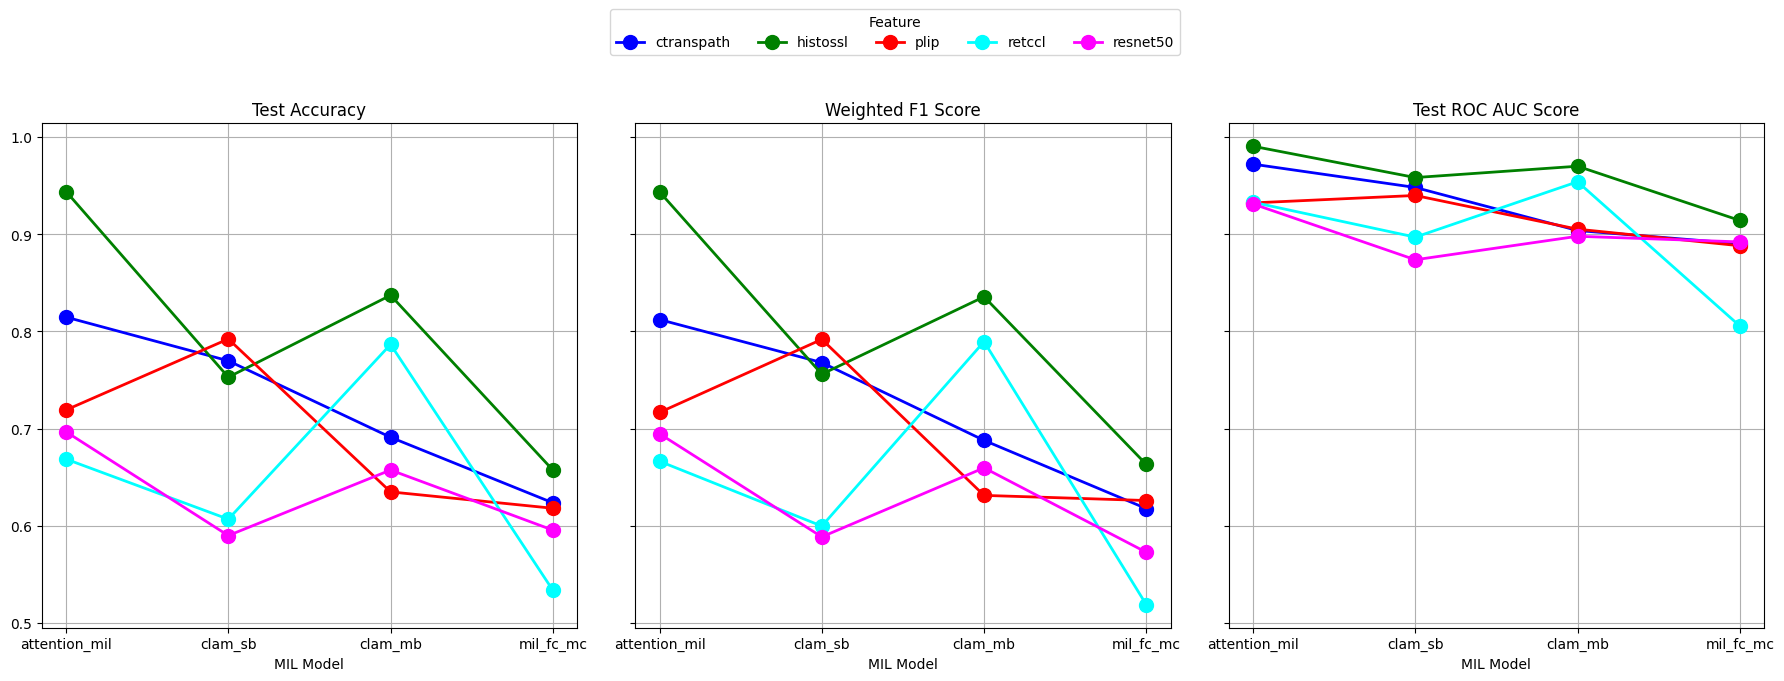

In [20]:
# # Create figure and axes
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# # Get unique models and features
# models = df['mil_model'].unique()
# features = df['feature'].unique()

# # Colors and markers for the plot
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# markers = ['o', '^', 's', 'p', '*', '+', 'x']

# # Plot each metric
# for ax, metric in zip(axes, ["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
#     for feature, color, marker in zip(features, colors, markers):
#         # Filter data for each feature and plot each model
#         subset = df[df['feature'] == feature]
#         for model in models:
#             model_data = subset[subset['mil_model'] == model]
#             ax.plot(model_data['mil_model'], model_data[metric], label=f'{feature} ({model})',
#                     color=color, marker=marker, markersize=10, linestyle='-', linewidth=2)
#     ax.set_title(metric)
#     ax.set_xlabel('MIL Model')
#     ax.grid(True)

# # Place a legend outside of the last plot
# handles, labels = axes[-1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=4, title="Feature (Model)")


# # Adjust layout and display
# plt.tight_layout()
# plt.show()



# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors for the features
feature_colors = ['blue', 'green', 'red', 'cyan', 'magenta']
color_dict = dict(zip(features, feature_colors))

# Plot each metric
for ax, metric in zip(axes, ["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    for feature in features:
        feature_data = df[df['feature'] == feature]
        x = list(range(len(models)))  # x-axis positions for the models
        y = [feature_data[feature_data['mil_model'] == model][metric].values[0] for model in models]
        ax.plot(x, y, label=f'{feature}', color=color_dict[feature], marker='o', markersize=10, linestyle='-', linewidth=2)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_title(metric)
    ax.set_xlabel('MIL Model')
    ax.grid(True)

# Configure legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 1.04), ncol=len(features), title="Feature")

# Adjust layout and display
plt.tight_layout()
plt.show()

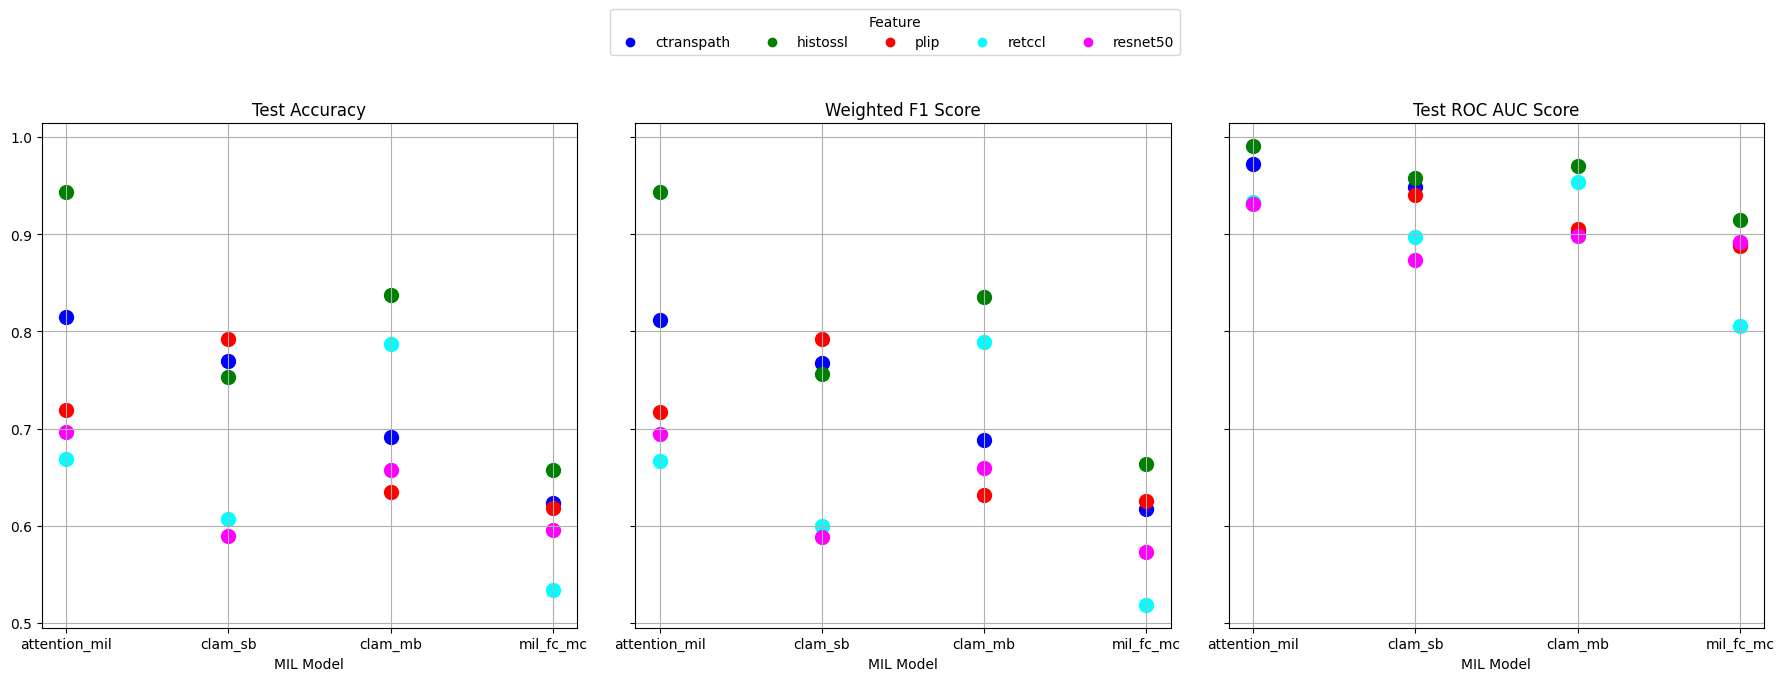

In [21]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get unique models and features
models = df['mil_model'].unique()
features = df['feature'].unique()

# Colors for the features
feature_colors = ['blue', 'green', 'red', 'cyan', 'magenta']
color_dict = dict(zip(features, feature_colors))

# Plot each metric
for ax, metric in zip(axes, ["Test Accuracy", "Weighted F1 Score", "Test ROC AUC Score"]):
    for model in models:
        for feature in features:
            model_data = df[(df['mil_model'] == model) & (df['feature'] == feature)]
            ax.scatter(model_data['mil_model'], model_data[metric], label=feature if model == models[0] else "",
                       color=color_dict[feature], s=100)
    ax.set_title(metric)
    ax.set_xlabel('MIL Model')
    ax.grid(True)

# Configure legend
fig.legend([plt.Line2D([0], [0], color=color, marker='o', linestyle='') for color in feature_colors], features,
           loc='lower center', bbox_to_anchor=(0.5, 1.04), ncol=5, title="Feature")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd 
import os

In [27]:
slide_df = pd.read_csv('D:\github\CLAM\dataset_csv\idh1_tumor_vs_normal_clean165.csv')
slide_df

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\ShivamSingh\AppData\Local\Temp\ipykernel_11628\1015589831.py:1: SyntaxWarning: invalid escape sequence '\g'
  slide_df = pd.read_csv('D:\github\CLAM\dataset_csv\idh1_tumor_vs_normal_clean165.csv')


,case_id,slide_id,label
0,patient_0,AML_Box8_OT47,tumor_tissue
1,patient_1,AML_Box10_OT05,tumor_tissue
2,patient_2,AML_Box12_OT40,tumor_tissue
3,patient_3,AML_Box13_OT61,tumor_tissue
4,patient_4,AML_Box10_OT13,normal_tissue
...,...,...,...
121,patient_121,AML_Box13_OT07,normal_tissue
122,patient_122,AML_Box13_OT63,tumor_tissue
123,patient_123,AML_Box8_OT64,tumor_tissue
124,patient_124,AML_Box10_OT01,normal_tissue


In [29]:
slide_list = slide_df['slide_id'].values.tolist()
len(slide_list)

126

# Evaluation 

In [24]:
project_path = r'D:\github\slideflow\panda_project'

bag_names = ['bags_ctranspath','bags_histossl','bags_plip','bags_retccl','bags_resnet50_imagenet']
mil_models =  ['attention_mil','clam_sb', 'clam_mb', 'mil_fc_mc']

for bag in bag_names:
# Loop over each model type
    for model in mil_models:
        print(f"Training model {model} with bags from {bag}")
        model_dir = os.path.join(project_path,f'model_{model}_{bag}')
        print(model_dir)
        mil_model_files = glob.glob(f'{model_dir}/**/models/**.pth',  recursive = True)
        # print(mil_model_files)
        for mil_model_file in mil_model_files:
            print(mil_model_file)
            save_path = mil_model_file.split('models')[0]
            print(save_path)

    #         # Define configuration common to all models
            config_args = {
                'model': model,
                'lr': 1e-4,
                'batch_size': 32,
                'epochs': 50,
                'fit_one_cycle': True,
            }

            if model in ['clam_sb', 'clam_mb', 'mil_fc_mc']:
                config_args['B'] = 45

            # Configure the MIL model for the current combination
            config = mil_config(**config_args)

            # Evaluate a saved MIL model
            df = P.evaluate_mil(
                config=config,
                model= mil_model_file,
                outcomes='label',
                dataset=dataset,        
                bags=f'panda_project/{bag}/',
            )
            df.to_csv(f'{save_path}/test_prediction.csv')
            break
        
        break
    break

Training model attention_mil with bags from bags_ctranspath
D:\github\slideflow\panda_project\model_attention_mil_bags_ctranspath
D:\github\slideflow\panda_project\model_attention_mil_bags_ctranspath\00000-attention_mil-label\models\best_valid.pth
D:\github\slideflow\panda_project\model_attention_mil_bags_ctranspath\00000-attention_mil-label\
